In [ ]:
! git clone https://github.com/Marco-Velazz/scratchpad
%run ./scratchpad/get_data.py

Cloning into 'scratchpad'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 24 (delta 4), reused 4 (delta 4), pack-reused 16 (from 1)
Receiving objects: 100% (24/24), 25.56 KiB | 1.97 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Download complete
Extracting data files...
Data extracted


**Q1**

1. Regression predicts a continous numerical outcome, while classification predicts a categorical label. The difference is that regression outputs numbers, and classification outputs categories.
2. A confusion matrix is a table that compares a model's predicted class labels to the true labels. It shows true positives, true negatives, false positives, and false negatives, helping show the mistakes the model makes.
3. Accuracy is the proportion of total predictions that are correct.However, it can be bad when classes are not balanced because a model can achieve high accuracy by always predicting the majority class.
4. RMSE measures the average magnitude of prediction errors in a regression model. It measures how far predicted values are from actual values.
5. Underfitting occurs when a model is too simple to capture the true pattern in the data, leading to poor performance. Overfitting occurs when a model is too complex and memorizes the training data, leading to good training performance but poor testing performance.
6. Splitting data into training and testing sets allows us to evaluate how well a model generalizes to new, unseen data. Chooseing a model based on the test set performance helps prevent overfitting and leads to better predictive performance.
7. Predicting a class label is simple and easy to interpret but does not show uncertainty. Predicting probabilities provides more information about confidence and allows flexible decision thresholds, but can be harder to understand.

**Q2**

The k-NN classifier achieves 50.9% accuracy, performing much better than chance but with uneven performance across classes. Mine Type 2 is predicted very accurately, with high precision and recall, while Types 3, 4, and 5 are frequently confused with one another. The confusion matrix reveals misclassification between similar mine types, showing that the features do not fully separate those classes. In practice, this model should be used as a decision-support tool, relying more heavily on high-confidence predictions and flagging uncertain cases for review.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

df = pd.read_csv("/content/data/land_mines.csv")

df.head()

,voltage,height,soil,mine_type
0,0.338157,0.000000,0.0,1
1,0.320241,0.181818,0.0,1
2,0.287009,0.272727,0.0,1
3,0.256284,0.454545,0.0,1
4,0.262840,0.545455,0.0,1


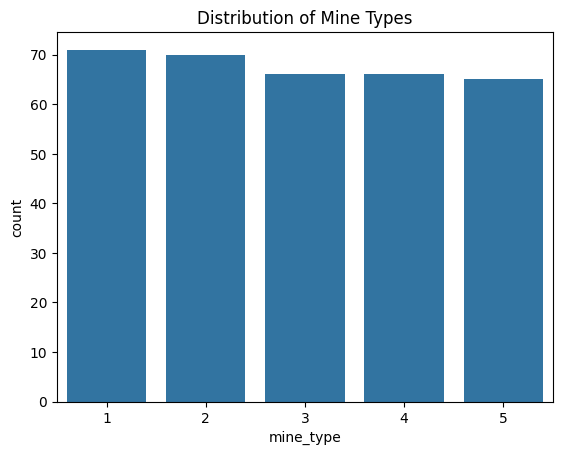

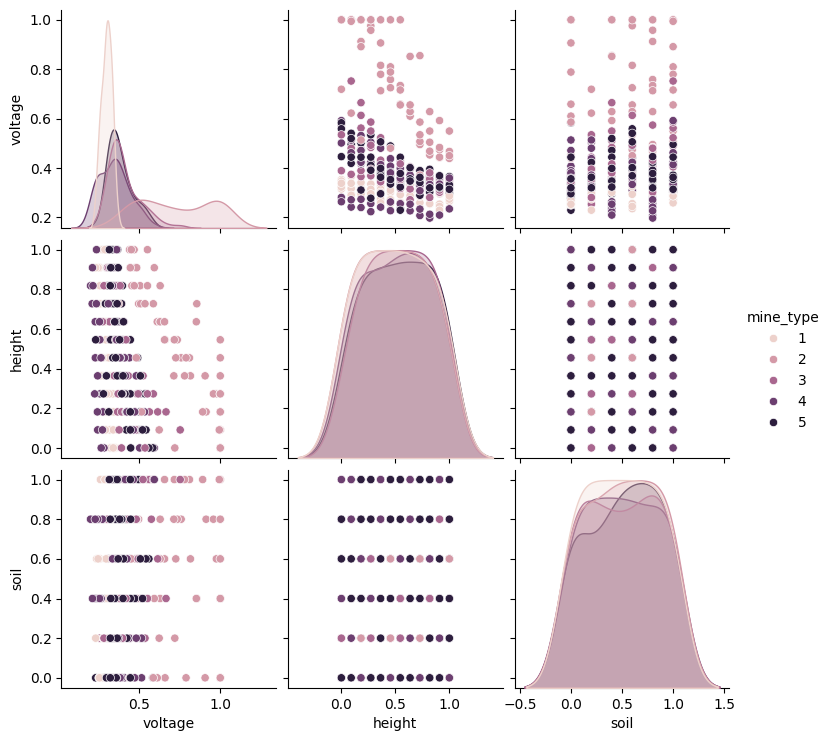

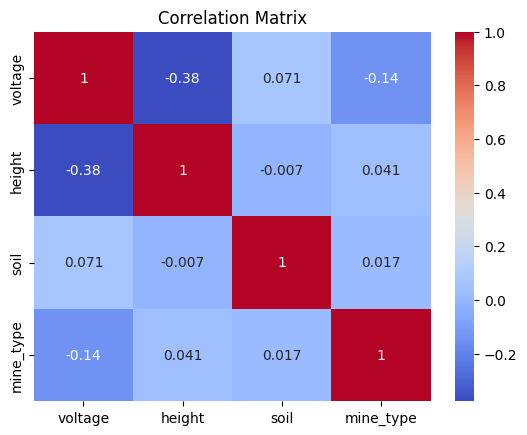

In [ ]:
sns.countplot(x="mine_type", data=df)
plt.title("Distribution of Mine Types")
plt.show()

sns.pairplot(df, hue="mine_type")
plt.show()

sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

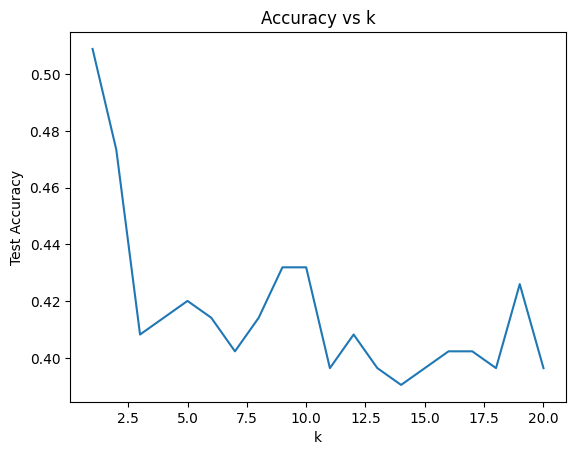

Best k: 1
Best Accuracy: 0.5088757396449705


In [ ]:
X = df[["voltage", "height", "soil"]]
y = df["mine_type"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, stratify=y, random_state=42
)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    preds = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, preds)
    accuracies.append(acc)

plt.plot(k_values, accuracies)
plt.xlabel("k")
plt.ylabel("Test Accuracy")
plt.title("Accuracy vs k")
plt.show()

best_k = k_values[np.argmax(accuracies)]
print("Best k:", best_k)
print("Best Accuracy:", max(accuracies))

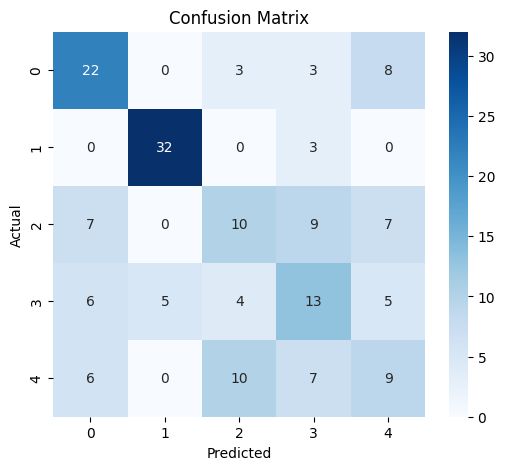

Accuracy: 0.5088757396449705

Classification Report:

              precision    recall  f1-score   support

           1       0.54      0.61      0.57        36
           2       0.86      0.91      0.89        35
           3       0.37      0.30      0.33        33
           4       0.37      0.39      0.38        33
           5       0.31      0.28      0.30        32

    accuracy                           0.51       169
   macro avg       0.49      0.50      0.49       169
weighted avg       0.50      0.51      0.50       169



In [ ]:
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_scaled, y_train)

y_pred = knn_final.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

**Q3**

The dataset contained 2,499 observations with no missing values in price, year, or mileage. After max-min normalization and an 80/20 train-test split, k-NN regression was fit for values of k from 1 to 30. The test MSE decreased sharply as k increased from 1, indicating that small k values led to overfitting. The lowest MSE occurred around k ≈ 30, which was selected as optimal. As k increased, the predicted vs. actual price plots showed smoother predictions and less variability. For very small k, predictions were noisy and overfitting. For large k, predictions clustered around the average price, slightly underfitting the data by failing to capture extreme high or low prices. The optimal k balances these effects.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

df = pd.read_csv("./data/USA_cars_datasets.csv")

df = df[["price", "year", "mileage"]]

print(df.isna().sum())

df = df.dropna()

print(df.head())
print("Dimensions:", df.shape)

price      0
year       0
mileage    0
dtype: int64
   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
Dimensions: (2499, 3)


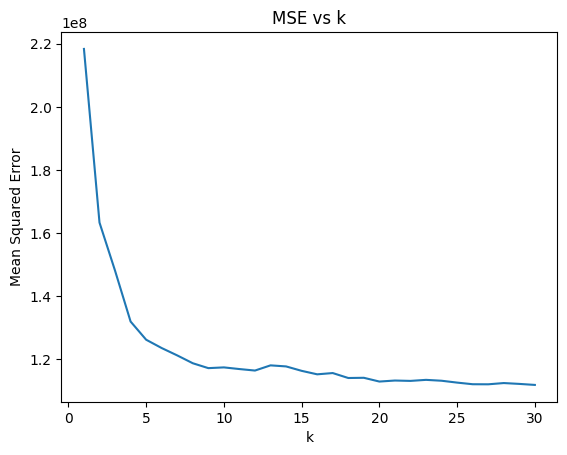

Optimal k: 30
Lowest MSE: 111841978.69289334


In [ ]:
def maxmin_scale(col):
    return (col - col.min()) / (col.max() - col.min())

df["year"] = maxmin_scale(df["year"])
df["mileage"] = maxmin_scale(df["mileage"])

X = df[["year", "mileage"]]
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

k_values = range(1, 31)
mse_list = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    mse_list.append(mse)

plt.plot(k_values, mse_list)
plt.xlabel("k")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs k")
plt.show()

optimal_k = k_values[np.argmin(mse_list)]
print("Optimal k:", optimal_k)
print("Lowest MSE:", min(mse_list))

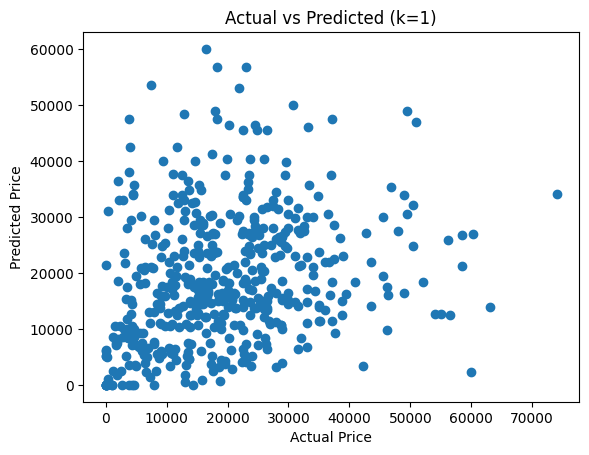

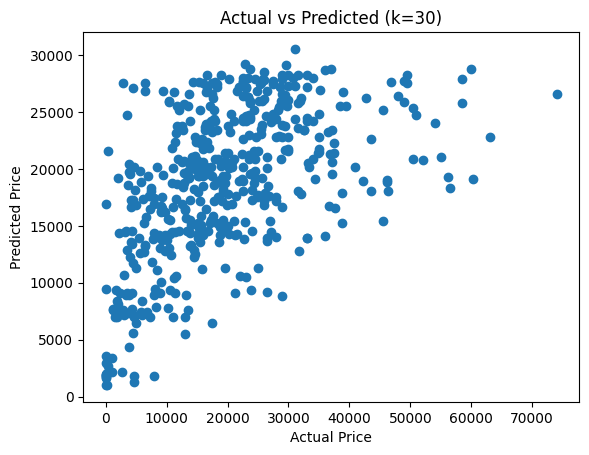

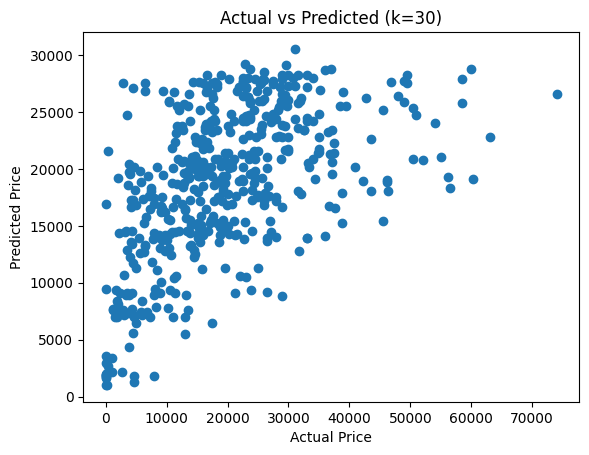

In [ ]:
for k in [1, optimal_k, 30]:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    plt.figure()
    plt.scatter(y_test, preds)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"Actual vs Predicted (k={k})")
    plt.show()

**Q6**

A k-NN regression model was trained on complete cases using Price and Beds to predict Review Scores Rating. The optimal k was selected using an 80/20 train-test split, choosing k = 29 because it minimized test MSE. The kernel density comparison shows that the imputed ratings follow the same general central tendency as the observed ratings but are more tightly concentrated around high values. The imputed distribution shows less variance and fewer extreme values, reflecting k-NN regression. While the model preserves the overall level of ratings, it slightly underfits by shrinking predictions toward the mean and reducing natural variability.

Complete cases: (22111, 3)
Missing ratings (predictable): (8282, 3)


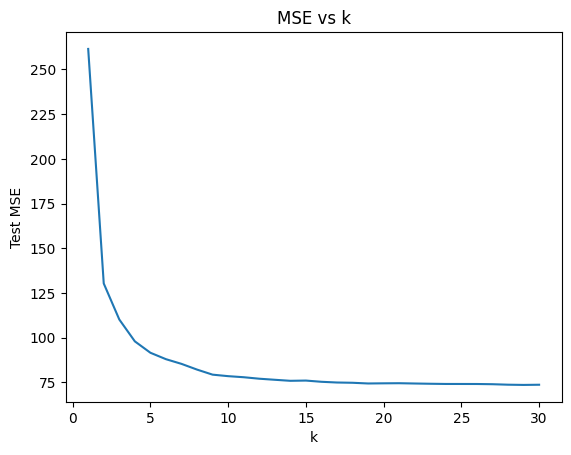

Optimal k: 29


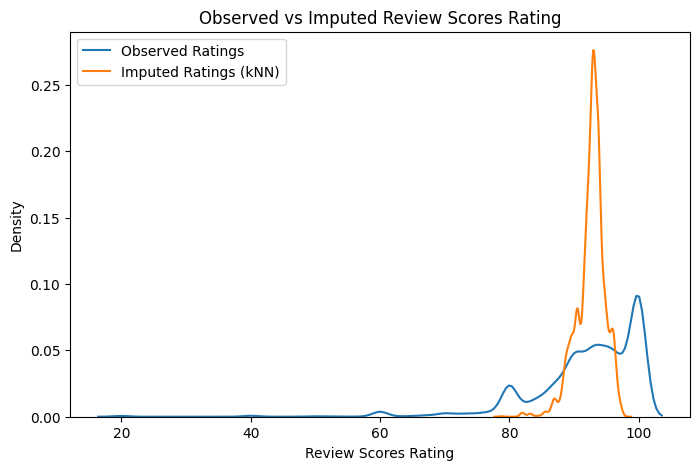

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("./data/airbnb_hw.csv")
df = df.loc[:, ["Review Scores Rating", "Price", "Beds"]]

df["Price"] = df["Price"].replace(r"[\$,]", "", regex=True)
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")

df_missing = df.loc[df["Review Scores Rating"].isnull()].copy()
df_complete = df.dropna(subset=["Review Scores Rating", "Price", "Beds"]).copy()

df_missing = df_missing.dropna(subset=["Price", "Beds"]).copy()

print("Complete cases:", df_complete.shape)
print("Missing ratings (predictable):", df_missing.shape)

scaler = MinMaxScaler()
df_complete[["Price", "Beds"]] = scaler.fit_transform(df_complete[["Price", "Beds"]])
df_missing[["Price", "Beds"]] = scaler.transform(df_missing[["Price", "Beds"]])

X = df_complete[["Price", "Beds"]]
y = df_complete["Review Scores Rating"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

k_values = range(1, 31)
mse_list = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse_list.append(mean_squared_error(y_test, preds))

plt.plot(k_values, mse_list)
plt.xlabel("k")
plt.ylabel("Test MSE")
plt.title("MSE vs k")
plt.show()

optimal_k = k_values[np.argmin(mse_list)]
print("Optimal k:", optimal_k)

final_model = KNeighborsRegressor(n_neighbors=optimal_k)
final_model.fit(X, y)

pred_missing = final_model.predict(df_missing[["Price", "Beds"]])

plt.figure(figsize=(8,5))
sns.kdeplot(y, label="Observed Ratings")
sns.kdeplot(pred_missing, label="Imputed Ratings (kNN)")
plt.legend()
plt.title("Observed vs Imputed Review Scores Rating")
plt.show()